## <center> Análise da base de Alimentos Regularizados e Situação do Registro </center>

#### <center> 📈 Análise de Dados 📉

#### Importações

In [322]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree

#### Consumindo a base vinda de um arquivo pickle

In [323]:
base = pickle.load(open('base_consumo', 'rb'))

display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


In [324]:
print(base['ConsumptionSpecificity'].unique())

['Alcoholic beverages' 'Beer and beer-like beverage'
 'Mixed alcoholic drinks' 'Unsweetened spirits and liqueurs'
 'Wine and wine-like drinks' 'Animal and vegetable fats/oils'
 'Fat emulsions and blended fats'
 'Hot drinks and similar (coffee, cocoa, tea and herbal infusions)'
 'Ingredients for coffee, cocoa, tea, and herbal infusions'
 'Dishes, incl. Ready to eat meals (excluding soups and salads)'
 'Fried or extruded cereal, seed or root-based products'
 'Soups and salads' 'Processed eggs' 'Unprocessed eggs' 'Crustaceans'
 'Fish (meat)' 'Fish and seafood processed' 'Molluscs'
 'Fruit used as fruit' 'Processed fruit products'
 'Concentrated or dehydrated fruit/vegetables juices'
 'Extracts of plant origin' 'Fruit / vegetable juices and nectars'
 'Bread and similar products' 'Breakfast cereals'
 'Cereals and cereal primary derivatives' 'Fine bakery wares'
 'Pasta, doughs and similar products' 'Legumes'
 'Nuts, oilseeds and oilfruits'
 'Processed legumes, nuts, oilseeds and spices' 'Spi

In [369]:
print(base['ConsumptionCategory'].unique())

['Alcoholic beverages'
 'Animal and vegetable fats and oils and primary derivatives thereof'
 'Coffee, cocoa, tea and infusions' 'Composite dishes'
 'Eggs and egg products'
 'Fish, seafood, amphibians, reptiles and invertebrates'
 'Fruit and fruit products'
 'Fruit and vegetable juices and nectars (including concentrates)'
 'Grains and grain-based products' 'Legumes, nuts, oilseeds and spices'
 'Major isolated ingredients, additives, flavours, baking and processing aids'
 'Meat and meat products' 'Milk and dairy products' 'Other ingredients'
 'Products for non-standard diets, food imitates and food supplements'
 'Seasoning, sauces and condiments'
 'Starchy roots or tubers and products thereof, sugar plants'
 'Sugar and similar, confectionery and water-based sweet desserts'
 'Vegetables and vegetable products' 'Water and water-based beverages'
 'Food products for young population']


In [325]:
# Filtra a base excluindo as linhas com 'Pregnant women' e 'Lactating women' em 'PopulationGroup'
base = base[~base['PopulationGroup'].isin(['Pregnant women', 'Lactating women'])]
display(base)


,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


#### Separando atributos e respostas

In [326]:
df_resposta = base['ConsumptionCategory']
df_atributos = base.drop(columns='ConsumptionCategory')

#### Transformando dados

In [327]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_resposta)

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

x_enconded = preprocessador.fit_transform(df_atributos)

with open('preprocessador.pkl', mode='wb') as f:
    pickle.dump(preprocessador, f)

classifier = GaussianNB()

#### Aplicando Smote

In [328]:
smote = SMOTE()
x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

#### Aplicando Oversample

In [329]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

#### Aplicando Undersample

In [330]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')
X_undersampled, y_undersampled = rus.fit_resample(x_enconded, y_encoded)

#### <center> Naive Bayes

#### Com Cross Val e OverSample

Melhor valor de k: 7
Cross-Validation Scores: [0.25829242 0.25890712 0.24926356 0.26677843 0.27231868 0.27430647
 0.26913344]
Mean Accuracy: 0.2641428742494483
Confusion Matrix:
[[ 2442  7041    26     0 27461    60   940   188    69   576   984   430
      0     6  1273    66     0   182     0    11     0]
 [  149 22919     0     0     0  6008     0     0     0  7554     0     2
      0   947  4176     0     0     0     0     0     0]
 [  841     0 40665     0     0     0     0     0     0     0     0   229
      0     0    20     0     0     0     0     0     0]
 [  848    18    14     0  8037  5966  4126     4  5259 15710    41   210
      0   416   971   130     0     0     0     5     0]
 [ 1504     0     0     0 26055     0  7973     0     0     0  4169   609
      0     0     0     0     0  1431     0    14     0]
 [  801   616    41     0     3 17716  2090    87  3134 12466  1473   380
      0   580  2303    53     0     0     0    12     0]
 [   36     0  9756     0   441     

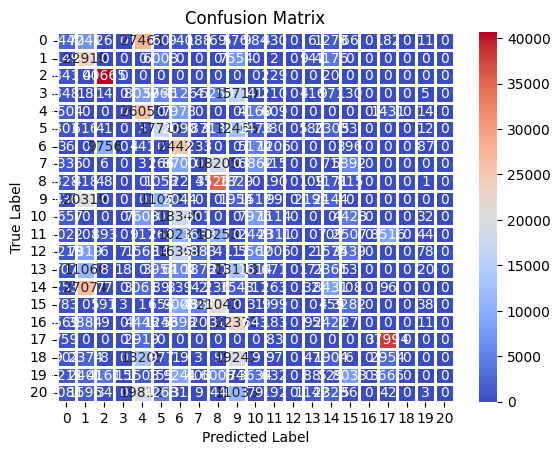

In [331]:

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
contador = 0

# Loop para encontrar o melhor valor de separação
for i in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

    contador = contador + 1

print(f"Melhor valor de k: {cv_final}")

# Ajustar valor de cv para algo razoável, como 5 ou 10
cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=cv_final))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Com Cross Val e UnderSample

7
Cross-Validation Scores: [0.61307784 0.61859911 0.60246833 0.63512343 0.61487657 0.62483759
 0.62429623]
Mean Accuracy: 0.6190398727760121
Confusion Matrix:
[[   54     0     0     0   745     0    34     5     0   271     6    14
      0     0    16     0     0     0     0     0     0]
 [    5     2     0     0     0     0     0     0     0  1095     0     0
      0     0    43     0     0     0     0     0     0]
 [    7     0   476     0     0     0     0     0     0   646     0     6
      0     0    10     0     0     0     0     0     0]
 [   12     0     0     0   201     0   124     0     1   792     3     2
      0     0     8     2     0     0     0     0     0]
 [   27     0     0     0   719     0   243     0     0     0   125    29
      0     0     2     0     0     0     0     0     0]
 [    9     0     0     0     0     0    58     5     0  1019    20     4
      0     0    30     0     0     0     0     0     0]
 [    0     0   270     0    22     0   584     0     0

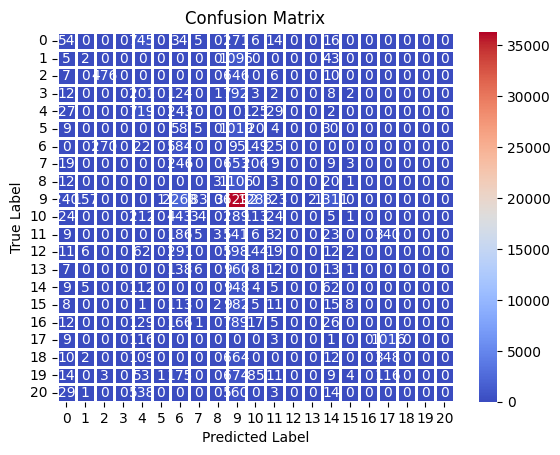

In [332]:
k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_undersampled, y_undersampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k
print(cv_final)

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Sem CrossVal com UnderSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.15      0.04      0.06       284
           1       0.00      0.00      0.00       275
           2       0.61      0.32      0.42       296
           3       0.00      0.00      0.00       273
           4       0.23      0.69      0.35       268
           5       0.00      0.00      0.00       303
           6       0.12      0.52      0.19       291
           7       0.00      0.00      0.00       291
           8       0.00      0.00      0.00       295
           9       0.74      0.88      0.80     10422
          10       0.05      0.09      0.07       297
          11       0.04      0.01      0.02       286
          12       0.00      0.00      0.00       278
          13       0.00      0.00      0.00       273
          14       0.04      0.06      0.05       270
          15       0.00      0.00      0.00       285
          16       0.00      0.00      0.00       306
          17       0.55    

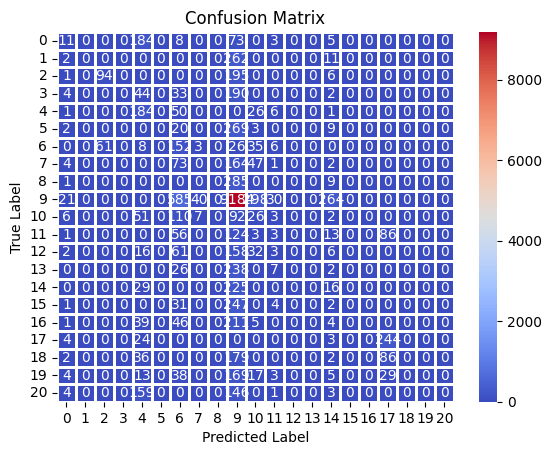

In [333]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_undersampled, y_undersampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Sem CrossVal com OverSample

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

              precision    recall  f1-score   support

           0       0.15      0.04      0.06       284
           1       0.00      0.00      0.00       275
           2       0.61      0.32      0.42       296
           3       0.00      0.00      0.00       273
           4       0.23      0.69      0.35       268
           5       0.00      0.00      0.00       303
           6       0.12      0.52      0.19       291
           7       0.00      0.00      0.00       291
           8       0.00      0.00      0.00       295
           9       0.74      0.88      0.80     10422
          10       0.05      0.09      0.07       297
          11       0.04      0.01      0.02       286
          12       0.00      0.00      0.00       278
          13       0.00      0.00      0.00       273
          14       0.04      0.06      0.05       270
          15       0.00      0.00      0.00       285
          16       0.00      0.00      0.00       306
          17       0.55    

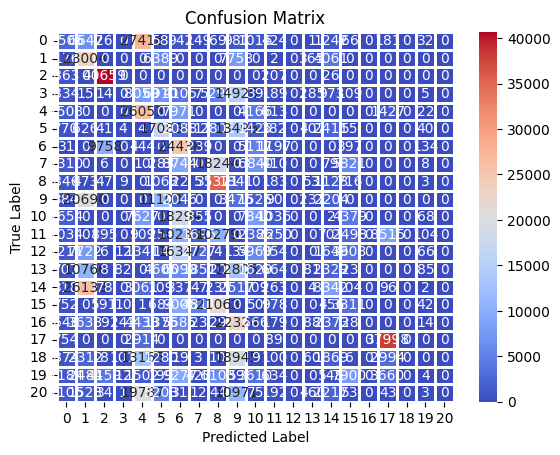

In [334]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### PCA com atributos para Naive Bayes

In [335]:
pca = PCA(n_components=5)
pca.fit(x_enconded)

PCA(n_components=5)

In [336]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.91573126e-01 8.35090552e-03 7.16247952e-05 3.95391766e-06
 2.81763728e-07]
[1.91850304e+06 1.76062516e+05 1.63054134e+04 3.83101568e+03
 1.02268682e+03]


#### Treinando modelo com as alterações do PCA e UnderSample

              precision    recall  f1-score   support

           0       0.44      0.06      0.11       284
           1       0.00      0.00      0.00       275
           2       0.65      0.45      0.53       296
           3       0.00      0.00      0.00       273
           4       0.23      0.65      0.34       268
           5       0.00      0.00      0.00       303
           6       0.14      0.57      0.23       291
           7       0.00      0.00      0.00       291
           8       0.00      0.00      0.00       295
           9       0.74      0.88      0.80     10422
          10       0.07      0.16      0.10       297
          11       0.07      0.03      0.04       286
          12       0.00      0.00      0.00       278
          13       0.00      0.00      0.00       273
          14       0.04      0.05      0.04       270
          15       0.00      0.00      0.00       285
          16       0.00      0.00      0.00       306
          17       0.57    

C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alecsilva-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

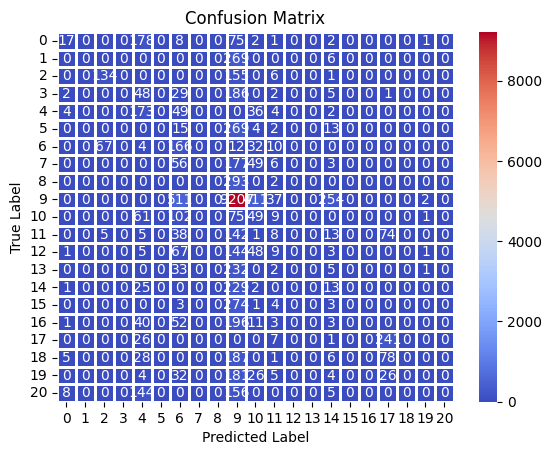

In [337]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_undersampled, y_undersampled = rus.fit_resample(reduced_x, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_undersampled, y_undersampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Treinando modelo com as alterações do PCA, UnderSample e CrossVal

7
Cross-Validation Scores: [0.61307784 0.61859911 0.60246833 0.63512343 0.61487657 0.62483759
 0.62429623]
Mean Accuracy: 0.6190398727760121
Confusion Matrix:
[[   54     0     0     0   745     0    34     5     0   271     6    14
      0     0    16     0     0     0     0     0     0]
 [    5     2     0     0     0     0     0     0     0  1095     0     0
      0     0    43     0     0     0     0     0     0]
 [    7     0   476     0     0     0     0     0     0   646     0     6
      0     0    10     0     0     0     0     0     0]
 [   12     0     0     0   201     0   124     0     1   792     3     2
      0     0     8     2     0     0     0     0     0]
 [   27     0     0     0   719     0   243     0     0     0   125    29
      0     0     2     0     0     0     0     0     0]
 [    9     0     0     0     0     0    58     5     0  1019    20     4
      0     0    30     0     0     0     0     0     0]
 [    0     0   270     0    22     0   584     0     0

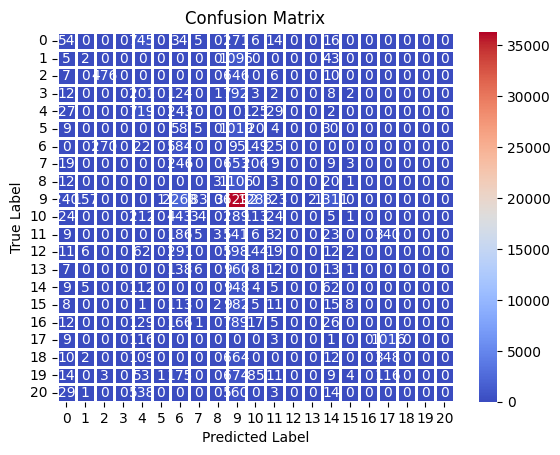

In [338]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_undersampled, y_undersampled = rus.fit_resample(reduced_x, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separação
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

# Executa a validação cruzada com a melhor separação
cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Acabei não colocando o Grid, pois descobri os melhores valores manualmente

#### <center> KNN

#### KNN com maior K

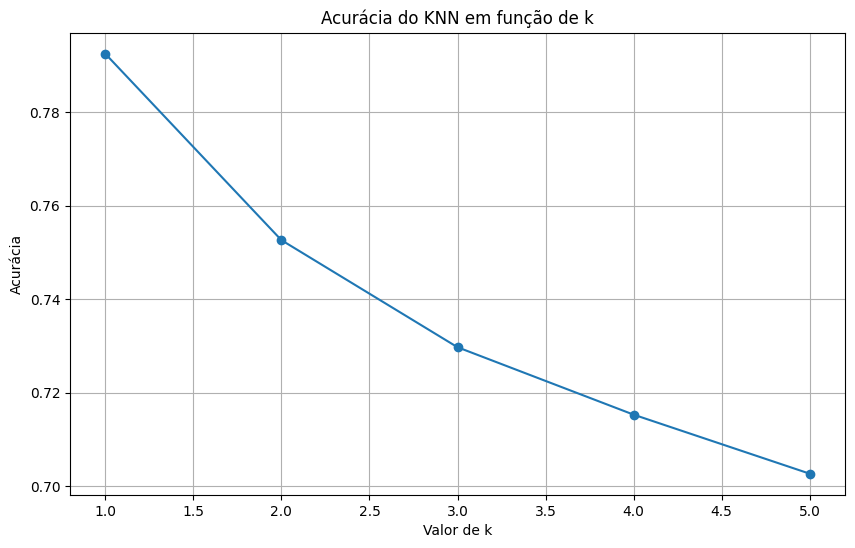

O melhor valor de k é: 0, com uma acurácia de: 1


In [339]:
k_values = []
accuracies = []
maior_acuracia = 1
k_final = 0

# Checando a melhor acúracia em um range de 5
for contador in range(5):
    k = 1 + contador
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    classificador_knn.fit(x_treino, y_treino)

    previsao_knn = classificador_knn.predict(x_teste)
    acuracia = accuracy_score(y_teste, previsao_knn)

    k_values.append(k)
    accuracies.append(acuracia)

    if acuracia > maior_acuracia:
        maior_acuracia = acuracia
        k_final = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Acurácia do KNN em função de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

print(f"O melhor valor de k é: {k_final}, com uma acurácia de: {maior_acuracia}")


#### Criando um classificador com o K de valor mais baixo

In [340]:
classificador_knn = KNeighborsClassifier(n_neighbors=k_final+1)

#### Treinando com CrossVal

Melhor k para Cross-Validation: 2
Cross-Validation Scores: [0.59204195 0.8236366 ]
Mean Accuracy: 0.7078392733015245
Confusion Matrix:
[[ 558    7    0    2  165   12    5    0    1  169   18   14    7   11
    50    0    1   44   35    0   46]
 [  64  577    1   13    0   29    0    1   22  297    0    3   55   27
    44    0    1    0    0    0   11]
 [   1    1  848   11    0    2   87   66   46    3   19   23    9    1
     0    8    0    0    0   20    0]
 [   0   92   12  595   19   21   13   32   64   62   52   36   19   16
     1   16   30   28   14    2   21]
 [ 257    0    0   13  421    4   81   62    0   97   17   18    3    1
    20    2    4   87   43   12    3]
 [  13   50    0   37    4  583   10    2   10  321    9   10    2   29
     5    4   30    0   20    0    6]
 [   4    0  129   12  140    3  546   67    3  150   29   17   32    1
     0    0    5    1    0    6    0]
 [   3    0  108   26  149   12   82  502  126   84   15    7   10    2
     0    6    0    0  

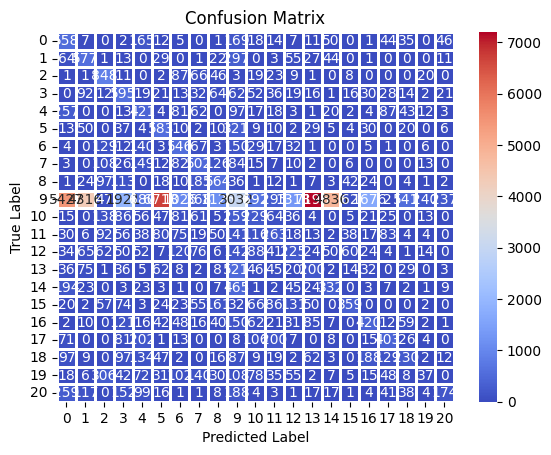

In [341]:
sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor número de separações para o Cross-Validation
for contador in range(10):
    k = 2 + contador
    # Instanciar o classificador com n_neighbors igual a k
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print("Melhor k para Cross-Validation:", cv_final)

# Reavaliação com o melhor K
classificador_knn = KNeighborsClassifier(n_neighbors=cv_final)
cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classificador_knn, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Testando sem CrossVal

0.7026726057906458
Confusion Matrix:
[[   88     0     0     5    41     0     8     0     0    75     2     2
      1     1     9     0     0    23    13     1    15]
 [    4    65     0     0     0     3     0     0     0   183     0     0
      5     2    12     0     0     0     0     0     1]
 [    1     0   160     4     0     2    16    34    15    11     8     8
      1     0     0    12     0     0     0    24     0]
 [    3    11     6    83    10     2     6     7    14    73     9     5
      7     2     0     6     2    14     8     1     4]
 [   49     0     0     7    60     0    16    12     0    57     2     1
      3     1     0     0     0    39    10     2     9]
 [    0     1     0     7     0    33     0     0     0   251     0     0
      2     1     0     0     5     1     1     0     1]
 [    2     0    23     3    12     5   101    16     7    97     2     4
      8     0     0     0     2     4     0     5     0]
 [    2     0    47     9    13     4    19   

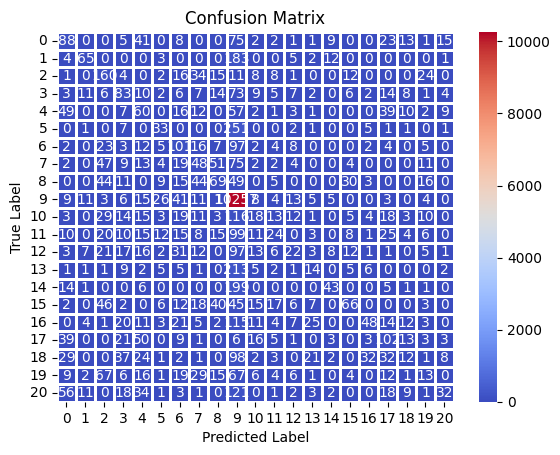

In [ ]:
acuracia = accuracy_score( y_teste, previsao_knn)

print(acuracia)

matriz = confusion_matrix(y_teste, previsao_knn)
print('Confusion Matrix:')
print(matriz)

sns.heatmap(matriz, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



#### Tentando aumentar a acurácia com UnderSample

0.7651304258170946
              precision    recall  f1-score   support

           0       0.29      0.40      0.34       160
           1       0.60      0.58      0.59       178
           2       0.47      0.79      0.59       167
           3       0.35      0.50      0.41       158
           4       0.24      0.38      0.29       157
           5       0.49      0.46      0.47       167
           6       0.38      0.43      0.40       159
           7       0.40      0.50      0.44       178
           8       0.56      0.52      0.54       177
           9       0.91      0.98      0.95      6325
          10       0.22      0.16      0.19       168
          11       0.27      0.19      0.22       177
          12       0.40      0.29      0.34       169
          13       0.34      0.13      0.19       159
          14       0.54      0.23      0.32       158
          15       0.61      0.31      0.42       175
          16       0.54      0.43      0.48       187
        

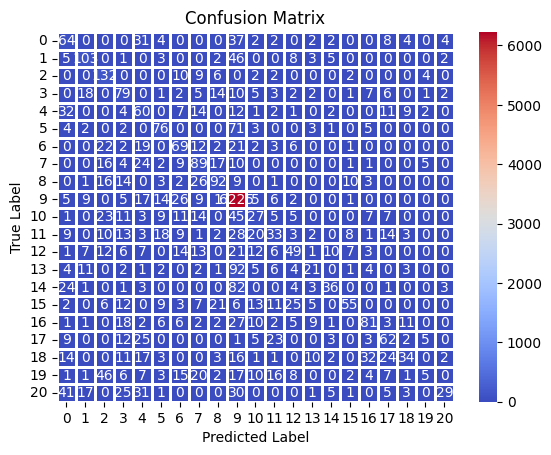

In [345]:
x_treino, x_teste, y_treino, y_teste = train_test_split(X_undersampled, y_undersampled, test_size=0.15, random_state=0)

treinandoKNN = classificador_knn.fit(x_treino, y_treino)

previsao = classificador_knn.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao)
print(acuracia)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Tentando aumentar com OverSample e CrossVal

In [ ]:
sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor separação de cross val
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(f"O melhor valor de k encontrado foi {cv_final} com acurácia de {maior_acuracia:.2f}")


O melhor valor de k encontrado foi 11 com acurácia de 0.82


In [ ]:
classificador_knn_final = KNeighborsClassifier(n_neighbors=1)
classificador_knn_final.fit(x_transformed, y_transformed)

# Calculando a acurácia para verificar que o modelo final tem 81% de acurácia
cv_scores_final = cross_val_score(classificador_knn_final, x_transformed, y_transformed, cv=11, scoring='accuracy')
acuracia_final = cv_scores_final.mean()

print(f"Acurácia final do modelo treinado: {acuracia_final:.2f}")

if acuracia_final >= 0.81:
    # Eu já adiciono num pkl, pois, após rodar todo o noote, percebi que era o melhor modelo. 
    with open('knn_model_81_percent.pkl', mode='wb') as f:
        pickle.dump(classificador_knn, f)
    print("Modelo KNN com 81% de acurácia foi salvo com sucesso!")
else:
    print("Acurácia do modelo não atingiu 81%. O modelo não será salvo.")

Acurácia final do modelo treinado: 0.84
Modelo KNN com 81% de acurácia foi salvo com sucesso!


#### <center> Gini </center>

#### Antes de modificar os Hyperparams

In [347]:
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_gini.fit(x_treino, y_treino)

DecisionTreeClassifier()

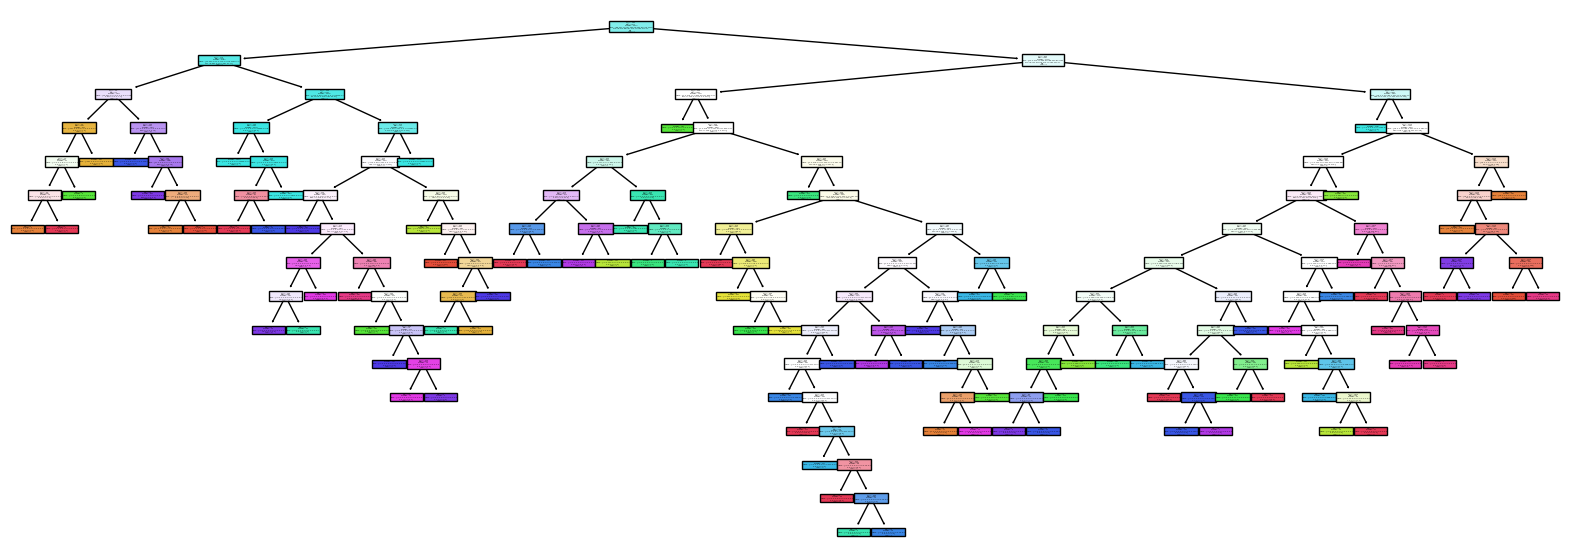

In [348]:
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_gini, class_names=classificador_gini.classes_.astype(str), filled=True)
plt.show()

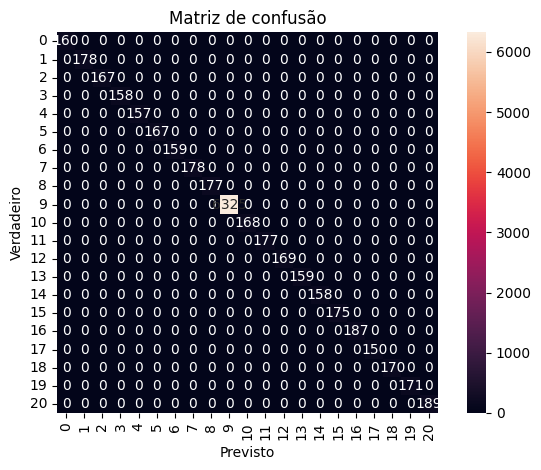

In [349]:
# Avaliação do classificador Gini - predição e matriz de confusão
y_pred_gini = classificador_gini.predict(x_teste)
matriz_de_confusao = confusion_matrix(y_teste, y_pred_gini)

sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True, yticklabels=classificador_gini.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [350]:
# Profundidade da árvore
print('Profundidade gini:', classificador_gini.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós gini: ', classificador_gini.tree_.node_count)

Profundidade gini: 15
Quantidade de nós gini:  173


#### Avaliação de acurácia e relatório de classificação

In [351]:
previsao_gini = classificador_gini.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00       158
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00       159
           7       1.00      1.00      1.00       178
           8       1.00      1.00      1.00       177
           9       1.00      1.00      1.00      6325
          10       1.00      1.00      1.00       168
          11       1.00      1.00      1.00       177
          12       1.00      1.00      1.00       169
          13       1.00      1.00      1.00       159
          14       1.00      1.00      1.00       158
          15       1.00      1.00      1.00       175
          16       1.00      1.00      1.00       187
          17

### <center> Entropia </center>

#### Antes de modificar os Hyperparams

In [352]:
classificador_entropy = tree.DecisionTreeClassifier(criterion='entropy')
classificador_entropy.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy')

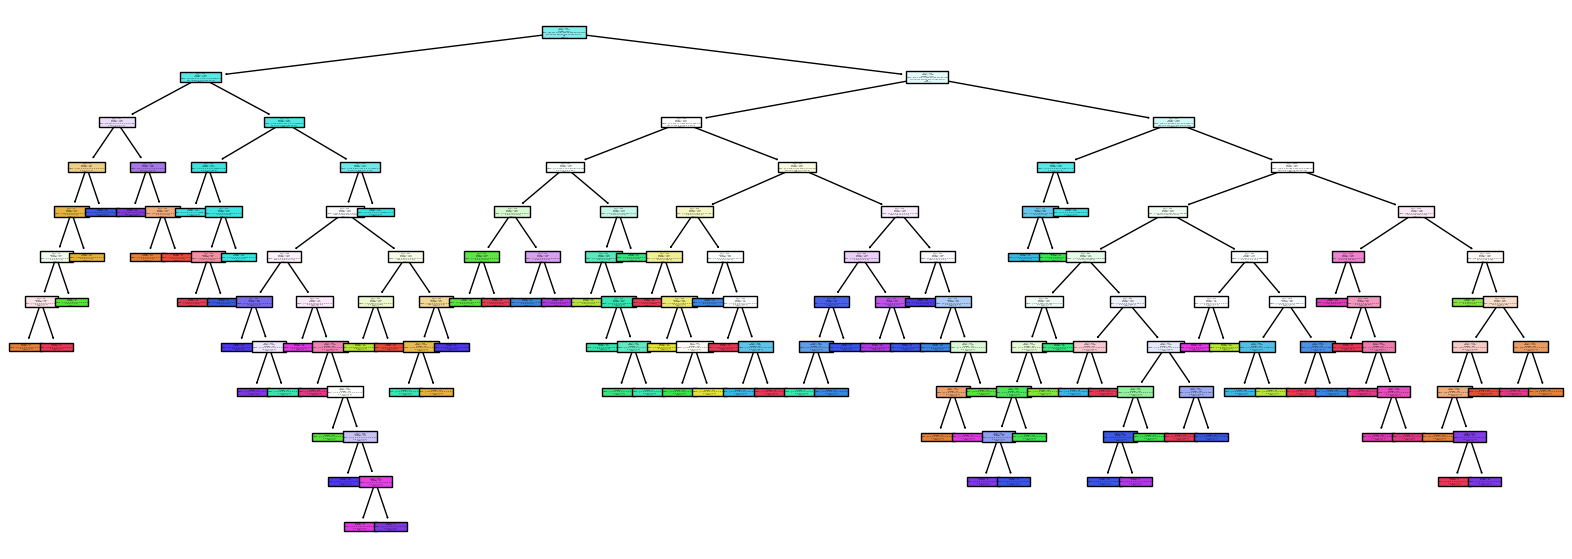

In [353]:
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_entropy, class_names=classificador_entropy.classes_.astype(str), filled=True)
plt.show()

#### Matriz de confusão

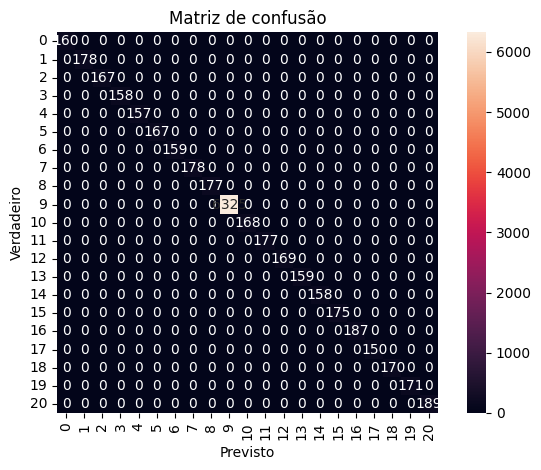

In [354]:
# Avaliação do classificador Entropia - predição e matriz de confusão
y_pred_entropy = classificador_entropy.predict(x_teste)

matriz_de_confusao_entropy = confusion_matrix(y_teste, y_pred_entropy)

sns.heatmap(matriz_de_confusao_entropy, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=classificador_entropy.classes_, 
            xticklabels=classificador_entropy.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [355]:
# Profundidade da árvore
print('Profundidade entropy:', classificador_entropy.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós entropy: ', classificador_entropy.tree_.node_count)

Profundidade entropy: 11
Quantidade de nós entropy:  173


#### Avaliação de acurácia e relatório de classificação

In [356]:
previsao_entropy = classificador_entropy.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_entropy)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_entropy)
print(report)

Acurácia:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00       158
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00       159
           7       1.00      1.00      1.00       178
           8       1.00      1.00      1.00       177
           9       1.00      1.00      1.00      6325
          10       1.00      1.00      1.00       168
          11       1.00      1.00      1.00       177
          12       1.00      1.00      1.00       169
          13       1.00      1.00      1.00       159
          14       1.00      1.00      1.00       158
          15       1.00      1.00      1.00       175
          16       1.00      1.00      1.00       187
          17

#### <center> Depois de modificar os Hyperparams </center>

In [357]:
# Otimização de hiperparâmetros com GridSearchCV
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5,10],
    'max_features': [None, 'sqrt', 'log2']
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros, scoring='accuracy')
grid.fit(x_treino, y_treino)
print('Melhores hiperparâmetros:', grid.best_params_)

Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [358]:
# Treinamento com o melhor modelo obtido no GridSearchCV
melhor_classificador = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    splitter='best'
)
melhor_classificador.fit(x_treino, y_treino)

DecisionTreeClassifier(min_samples_split=5)

#### Plotando a árvore depois de modificar os Hyperparams

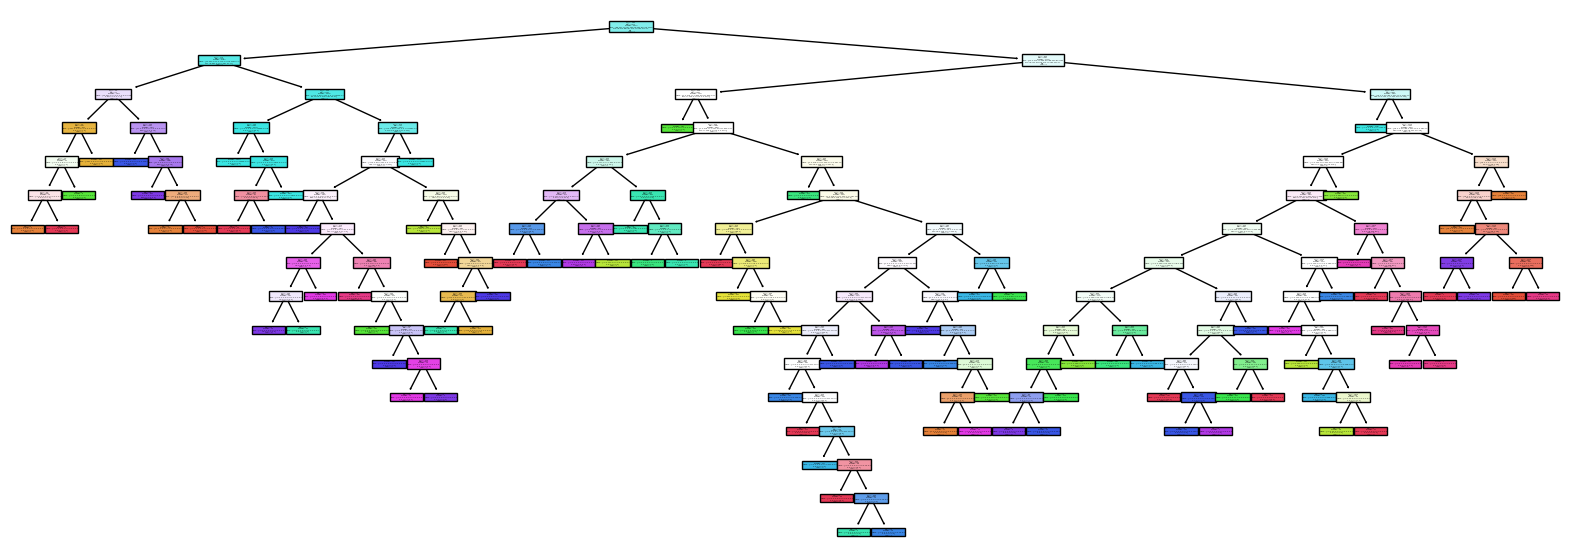

In [359]:
plt.figure(figsize=(20,7))
tree.plot_tree(melhor_classificador, class_names=melhor_classificador.classes_.astype(str), filled=True)

plt.show()

In [360]:
# Profundidade da árvore
print('Profundidade gini:', melhor_classificador.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós gini: ', melhor_classificador.tree_.node_count)

Profundidade gini: 15
Quantidade de nós gini:  173


#### Matriz de confusão

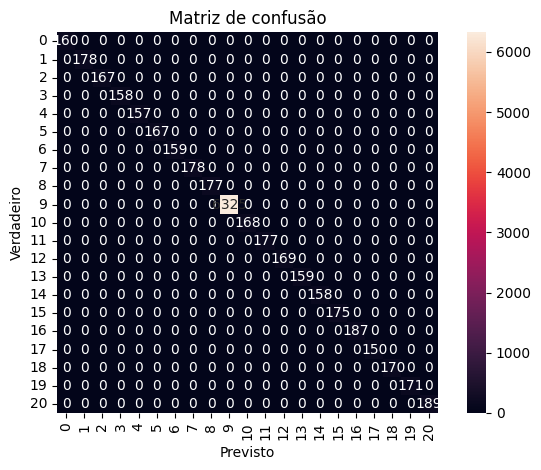

In [361]:
# Nova matriz de confusão com o melhor classificador
y_pred = melhor_classificador.predict(x_teste)

matriz_de_confusao_gini = confusion_matrix(y_teste, y_pred)

sns.heatmap(matriz_de_confusao_gini, square=True, annot=True, fmt='d', cbar=True, yticklabels=melhor_classificador.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

#### Avaliação final da acurácia e relatório de classificação

In [362]:
previsao_gini = melhor_classificador.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       1.00      1.00      1.00       178
           2       1.00      1.00      1.00       167
           3       1.00      1.00      1.00       158
           4       1.00      1.00      1.00       157
           5       1.00      1.00      1.00       167
           6       1.00      1.00      1.00       159
           7       1.00      1.00      1.00       178
           8       1.00      1.00      1.00       177
           9       1.00      1.00      1.00      6325
          10       1.00      1.00      1.00       168
          11       1.00      1.00      1.00       177
          12       1.00      1.00      1.00       169
          13       1.00      1.00      1.00       159
          14       1.00      1.00      1.00       158
          15       1.00      1.00      1.00       175
          16       1.00      1.00      1.00       187
          17

In [363]:
predict_teste = classificador_gini.predict(x_treino)
print("Classificação:",predict_teste)
acuracia_teste = accuracy_score(y_treino, predict_teste)
print(acuracia_teste)

Classificação: [9 9 9 ... 9 9 2]
1.0


In [364]:
# Avaliar usando cross-validation2
x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)
scores = cross_val_score(melhor_classificador, x_enconded, y_encoded, cv=5, scoring='accuracy')

# Resultados
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.]
Accuracy: 1.00 (+/- 0.00)


In [379]:
# Salvar o preprocessador em um arquivo
with open('preprocessador.pkl', 'wb') as f:
    pickle.dump(preprocessador, f)

# Salvar o label_encoder em outro arquivo
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)
